In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")

In [9]:
#Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range"]

In [10]:
non_clean_cars_info = non_clean_cars[["Make", "Model"]]

In [11]:
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars_info)

Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make        Model
6         FORD       FUSION
7         AUDI         Q5 E
8         FORD        C-MAX
14        FORD        C-MAX
15         KIA         NIRO
...        ...          ...
130377     BMW         530E
130385    AUDI           A3
130390    JEEP     WRANGLER
130407  TOYOTA  PRIUS PRIME
130437     BMW         530E

[16446 rows x 2 columns]


In [12]:
#  Get all TESLA cars with the model year, and model type made in Bothell City.

tesla_cars = df[(df["Make"] == "TESLA") & (df["City"] == "Bothell")]
tesla_cars_info = tesla_cars[["Model Year", "Model"]]
print("\nTESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_info)



TESLA cars with the model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [14]:
#Get all the cars that have an electric range of more than 100, and were made after 2015
ele_cars = df[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]
ele_cars_info = ele_cars[["Make" , "Model Year" , "Model"]]
print("\ncars that have an electric range of more than 100, and were made after 2015")
print(ele_cars_info)


cars that have an electric range of more than 100, and were made after 2015
          Make  Model Year    Model
0        TESLA        2018  MODEL X
2        TESLA        2019  MODEL 3
4        TESLA        2017  MODEL S
12       TESLA        2020  MODEL 3
13       TESLA        2020  MODEL 3
...        ...         ...      ...
130417   TESLA        2020  MODEL Y
130428  NISSAN        2018     LEAF
130432   TESLA        2020  MODEL Y
130436   TESLA        2018  MODEL 3
130441   TESLA        2020  MODEL X

[34066 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

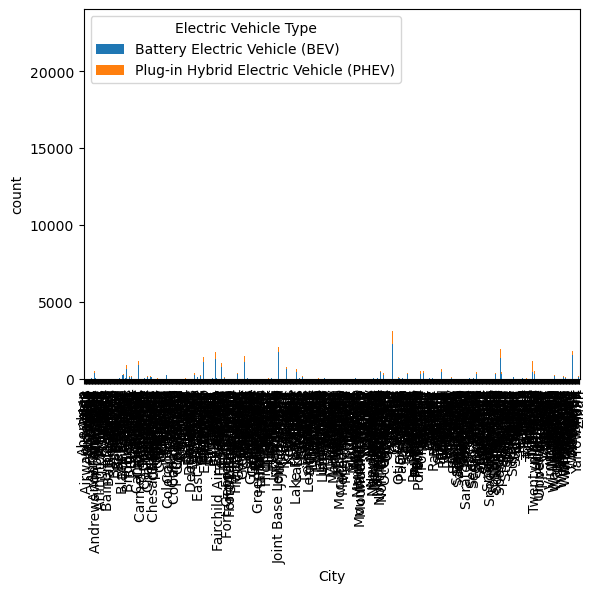

In [16]:
#Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(12,6))
df_city_ev_type = df.groupby(["City" , "Electric Vehicle Type"]).size().unstack().fillna(0)
df_city_ev_type.plot(kind = "bar" , stacked = True)
plt.xlabel("City")
plt.ylabel("count")
#plt.xticks(rotation =45)
plt.legend(title = "Electric Vehicle Type")
plt.show()